<a href="https://colab.research.google.com/github/osemuaimiosior/credit_risk/blob/master/Credit_worthiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls

drive  sample_data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/german_data.csv')
data.head() 

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4.1,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2.0
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1.0
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1.0
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2.0
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1.0


In [10]:
data.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4.1,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2.0
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1.0
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1.0
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2.0
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1.0


In [11]:
df =data.copy()

In [12]:
df.columns.values

array(['A11', '6', 'A34', 'A43', '1169', 'A65', 'A75', '4', 'A93', 'A101',
       '4.1', 'A121', '67', 'A143', 'A152', '2', 'A173', '1', 'A192',
       'A201', '1.1'], dtype=object)

In [13]:
columns = ['Checking_account_status', 'Duration_month','Credit_history','Purpose', 'Credit_amount',  
          'Savings_acc_or_bonds','Employment_Duration', 'Installment_rate_in_%_of_disposable_income',
          'Personal_status_&_sex','Other_debtors_&_guarantors','Residence_Status', 'Property', 'Age', 
           'installment_plans','Housing', 'Number_of_existing_credits_at_this_bank','Job',
       'Nos_of_dependance', 'Telephone', 'Foreign_worker','Credit_worthiness']

In [14]:
df.columns= columns

In [15]:
pd.options.display.max_columns=None

In [16]:
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Checking_account_status                     958 non-null    object 
 1   Duration_month                              958 non-null    int64  
 2   Credit_history                              958 non-null    object 
 3   Purpose                                     958 non-null    object 
 4   Credit_amount                               958 non-null    object 
 5   Savings_acc_or_bonds                        958 non-null    object 
 6   Employment_Duration                         958 non-null    object 
 7   Installment_rate_in_%_of_disposable_income  958 non-null    object 
 8   Personal_status_&_sex                       958 non-null    object 
 9   Other_debtors_&_guarantors                  958 non-null    object 
 10  Residence_Stat

In [18]:
df.head()

,Checking_account_status,Duration_month,Credit_history,Purpose,Credit_amount,Savings_acc_or_bonds,Employment_Duration,Installment_rate_in_%_of_disposable_income,Personal_status_&_sex,Other_debtors_&_guarantors,Residence_Status,Property,Age,installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Nos_of_dependance,Telephone,Foreign_worker,Credit_worthiness
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2.0
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1.0
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1.0
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2.0
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1.0


In [19]:
Checking_account_status = pd.get_dummies(df['Checking_account_status'])

In [20]:
Checking_account_status.columns.values

array(['A11', 'A12', 'A13', 'A14'], dtype=object)

In [21]:
clumns1=['<_0DM', '<_200DM', '>=_200DM', 'No_checking_account']
Checking_account_status.columns=clumns1

In [22]:
Credit_history = pd.get_dummies(df['Credit_history'])
Purpose = Checking_account_status = pd.get_dummies(df['Purpose'])
Savings = pd.get_dummies(df['Savings_acc_or_bonds'])
Employment = pd.get_dummies(df['Employment_Duration'])
Personal_status= pd.get_dummies(df['Personal_status_&_sex'])
Other = pd.get_dummies(df['Other_debtors_&_guarantors'])
Property = pd.get_dummies(df['Property'])
installment_plans = pd.get_dummies(df['installment_plans'])
Housing = pd.get_dummies(df['Housing'])
Job = pd.get_dummies(df['Job'])
Telephone = pd.get_dummies(df['Telephone'])
Foreign_worker = pd.get_dummies(df['Foreign_worker'])

In [23]:
Credit_history.columns.values

array(['A30', 'A31', 'A32', 'A33', 'A34'], dtype=object)

In [24]:
cl = ['no_credits_taken', 'Credits_paid_at_bank', 'Credits_paid_till now',
      'delay_in_paying_past_credit','critical_account']

In [25]:
Credit_history.columns = cl

In [26]:
Purpose.columns.values

array(['A40', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48',
       'A49'], dtype=object)

In [27]:
cl1 = ['car_new', 'car_used', 'others', 'furniture/equipment',
       'radio/television', 'domestic_appliances', 'repairs', 'education', 'retraining',
       'business']

In [28]:
Purpose.columns = cl1

In [29]:
Savings.columns.values

array(['0A6', '1A6', '24A', '28A', '2A6', '38A', '3A6', '4A6', '57A',
       '5A6', '6A6', '7A6', '82A', '8A6', '9A6', 'A61', 'A62', 'A63',
       'A64', 'A65'], dtype=object)

In [30]:
Savings = Savings.iloc[:,-5:]

In [31]:
Savings.columns.values

array(['A61', 'A62', 'A63', 'A64', 'A65'], dtype=object)

In [32]:
cl2 = ['<_100DM', '100-500DM', '500-1000DM', '>=1000DM', 'Unknown/no_savings']

In [33]:
Savings.columns = cl2

In [34]:
Employment.columns.values

array(['1A7', '2A7', '3A7', '4A7', '5A7', '61A', '62A', 'A71', 'A72',
       'A73', 'A74', 'A75'], dtype=object)

In [35]:
Employment = Employment.iloc[:,-5:]

In [36]:
Employment.columns.values

array(['A71', 'A72', 'A73', 'A74', 'A75'], dtype=object)

In [37]:
cl3 = ['unemployed', '<_1', '1-4years', '4-7years', '>=_7years']

In [38]:
Employment.columns = cl3

In [39]:
Personal_status.columns.values

array(['1:00 AM', '1A9', '2:00 AM', '2A9', '3:00 AM', '3A9', '4A9', 'A91',
       'A92', 'A93', 'A94'], dtype=object)

In [40]:
Personal_status = Personal_status.iloc[:,-4:]

In [41]:
Personal_status.columns.values

array(['A91', 'A92', 'A93', 'A94'], dtype=object)

In [42]:
cl4 = ['male_divorced/separated', 'female_divorced/separated/married', 'male_single',
       'male_married/widowed']

In [43]:
Personal_status.columns = cl4

In [44]:
Other.columns.values

array(['1A10', '2A10', '3A10', '91A1', '92A1', '93A1', 'A101', 'A102',
       'A103'], dtype=object)

In [45]:
Other = Other.iloc[:,-3:]

In [46]:
Other.columns.values

array(['A101', 'A102', 'A103'], dtype=object)

In [47]:
cl5 = ['none_debtors/guarantors', 'co-applicant', 'guarantor']

In [48]:
Other.columns = cl5

In [49]:
Property.columns.values

array(['1A12', '2A1', '2A12', '3A1', '3A12', '4A1', '4A12', 'A121',
       'A122', 'A123', 'A124'], dtype=object)

In [50]:
Property= Property.iloc[:,-4:]

In [51]:
cl6 = ['real estate','society_savings_agr/life_insurance', 'other_property','unknown/no_property']

In [52]:
Property.columns = cl6

In [53]:
installment_plans.columns.values

array(['0A14', '1A14', '29A1', '2A14', '32A1', '39A1', '3A14', '43A1',
       '4A14', '5A14', '60A1', '6A14', '7A14', '8A14', '9A14', 'A141',
       'A142', 'A143'], dtype=object)

In [54]:
installment_plans= installment_plans.iloc[:,-3:]

In [55]:
installment_plans.columns.values

array(['A141', 'A142', 'A143'], dtype=object)

In [56]:
cl7 = ['installment_plan_bank', 'installment_plan_stores', ' none']

In [57]:
installment_plans.columns = cl7

In [58]:
Housing.columns.values

array(['1A15', '2A15', '3A15', '41A1', '43A1', 'A151', 'A152', 'A153'],
      dtype=object)

In [59]:
Housing= Housing.iloc[:,-3:]

In [60]:
cl8 = ['housing_rent', 'housing_own','housing_for_free']

In [61]:
Housing.columns = cl8

In [62]:
Job.columns.values

array(['1A1', '1A17', '2A1', '2A17', '3A17', 'A171', 'A172', 'A173',
       'A174'], dtype=object)

In [63]:
Job = Job.iloc[:,-4:]

In [64]:
cl9 = ['unemployed_non_resident', 'unskilled_resident', 'skilled_employee',
       'self-employed_highly_qualified_employee']

In [65]:
Job.columns = cl9

In [66]:
Telephone.columns.values

array(['1A1', '1A19', '2A1', '2A19', 'A191', 'A192'], dtype=object)

In [67]:
Telephone = Telephone.iloc[:,-2:]

In [68]:
cl19 = ['telephone_None', 'telephone_Yes']

In [69]:
Telephone.columns = cl19

In [70]:
Foreign_worker.columns.values

array(['1A20', '2A20', '91A2', '92A2', 'A201', 'A202'], dtype=object)

In [71]:
cl20 = ['foreign_Yes', 'foreign_No']

In [72]:
Foreign_worker = Foreign_worker.iloc[:,-2:]

In [73]:
Foreign_worker.columns = cl20

In [74]:
df.head()

,Checking_account_status,Duration_month,Credit_history,Purpose,Credit_amount,Savings_acc_or_bonds,Employment_Duration,Installment_rate_in_%_of_disposable_income,Personal_status_&_sex,Other_debtors_&_guarantors,Residence_Status,Property,Age,installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Nos_of_dependance,Telephone,Foreign_worker,Credit_worthiness
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2.0
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1.0
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1.0
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2.0
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1.0


In [75]:
df = df.drop(['Checking_account_status','Credit_history','Purpose','Credit_amount',
             'Savings_acc_or_bonds','Employment_Duration','Personal_status_&_sex',
              'Other_debtors_&_guarantors','Property','installment_plans',
             'Housing','Job','Telephone','Foreign_worker'], axis =1)

In [76]:
df = pd.concat([df,Credit_history, Purpose, Savings, Employment, Personal_status, Other, 
                Property, installment_plans, Housing, Job, Telephone, Foreign_worker], axis = 1)

In [77]:
df.head()

,Duration_month,Installment_rate_in_%_of_disposable_income,Residence_Status,Age,Number_of_existing_credits_at_this_bank,Nos_of_dependance,Credit_worthiness,no_credits_taken,Credits_paid_at_bank,Credits_paid_till now,delay_in_paying_past_credit,critical_account,car_new,car_used,others,furniture/equipment,radio/television,domestic_appliances,repairs,education,retraining,business,<_100DM,100-500DM,500-1000DM,>=1000DM,Unknown/no_savings,unemployed,<_1,1-4years,4-7years,>=_7years,male_divorced/separated,female_divorced/separated/married,male_single,male_married/widowed,none_debtors/guarantors,co-applicant,guarantor,real estate,society_savings_agr/life_insurance,other_property,unknown/no_property,installment_plan_bank,installment_plan_stores,none,housing_rent,housing_own,housing_for_free,unemployed_non_resident,unskilled_resident,skilled_employee,self-employed_highly_qualified_employee,telephone_None,telephone_Yes,foreign_Yes,foreign_No
0,48,2,2,22,1,1,2.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
1,12,2,3,49,1,2,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
2,42,2,4,45,1,2,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
3,24,3,4,53,2,2,2.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,36,2,4,35,1,2,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0


In [78]:
clean_df = df.copy()

In [79]:
target = clean_df.iloc[:,6:7]

In [80]:
featuers = clean_df.drop(['Credit_worthiness'], axis=1)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [83]:
scaler = StandardScaler()

In [84]:
clean_df.head()

,Duration_month,Installment_rate_in_%_of_disposable_income,Residence_Status,Age,Number_of_existing_credits_at_this_bank,Nos_of_dependance,Credit_worthiness,no_credits_taken,Credits_paid_at_bank,Credits_paid_till now,delay_in_paying_past_credit,critical_account,car_new,car_used,others,furniture/equipment,radio/television,domestic_appliances,repairs,education,retraining,business,<_100DM,100-500DM,500-1000DM,>=1000DM,Unknown/no_savings,unemployed,<_1,1-4years,4-7years,>=_7years,male_divorced/separated,female_divorced/separated/married,male_single,male_married/widowed,none_debtors/guarantors,co-applicant,guarantor,real estate,society_savings_agr/life_insurance,other_property,unknown/no_property,installment_plan_bank,installment_plan_stores,none,housing_rent,housing_own,housing_for_free,unemployed_non_resident,unskilled_resident,skilled_employee,self-employed_highly_qualified_employee,telephone_None,telephone_Yes,foreign_Yes,foreign_No
0,48,2,2,22,1,1,2.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
1,12,2,3,49,1,2,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
2,42,2,4,45,1,2,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
3,24,3,4,53,2,2,2.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,36,2,4,35,1,2,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0


In [85]:
df_std = scaler.fit_transform(featuers)

In [86]:
x_train,x_test,y_train,y_test = train_test_split(featuers, target,random_state=42) 

In [87]:
import pickle
import warnings
warnings.filterwarnings('ignore')

In [88]:
clf = RandomForestClassifier().fit(x_train, y_train)

In [89]:
y_pred = clf.predict(x_test)

In [90]:
cross_score = cross_val_score(clf,y_test,y_pred, cv=5)

In [91]:
print(cross_score)
print('mean: ',np.mean(cross_score))

[0.83333333 0.83333333 0.83333333 0.79166667 0.79166667]
mean:  0.8166666666666667


In [92]:
pip install shap

     |████████████████████████████████| 327kB 9.7MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456462 sha256=f7a3759055aef0a1ba54fe18020754c91d86a11b0d0e57de4f7d64e3699dab06
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [93]:
import shap

In [107]:
explainer = shap.TreeExplainer(clf)

In [108]:
shap_values = explainer.shap_values(x_test)

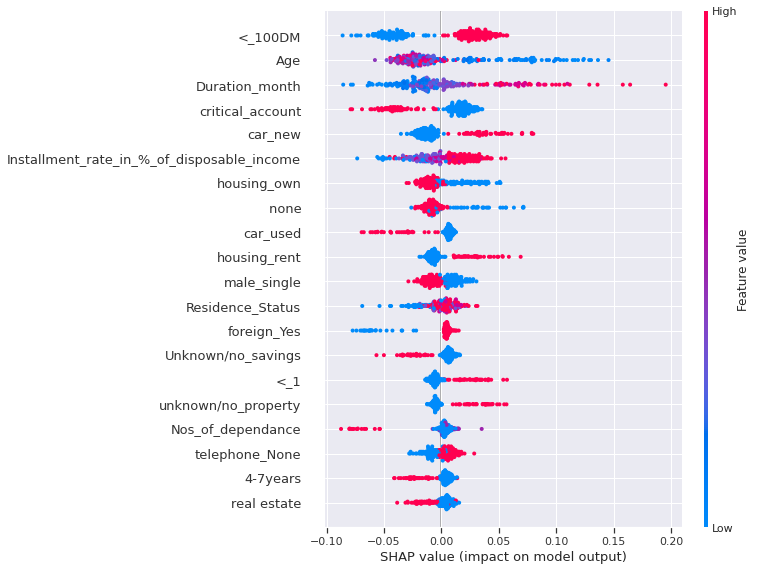

In [114]:
shap.summary_plot(shap_values[1], x_test)

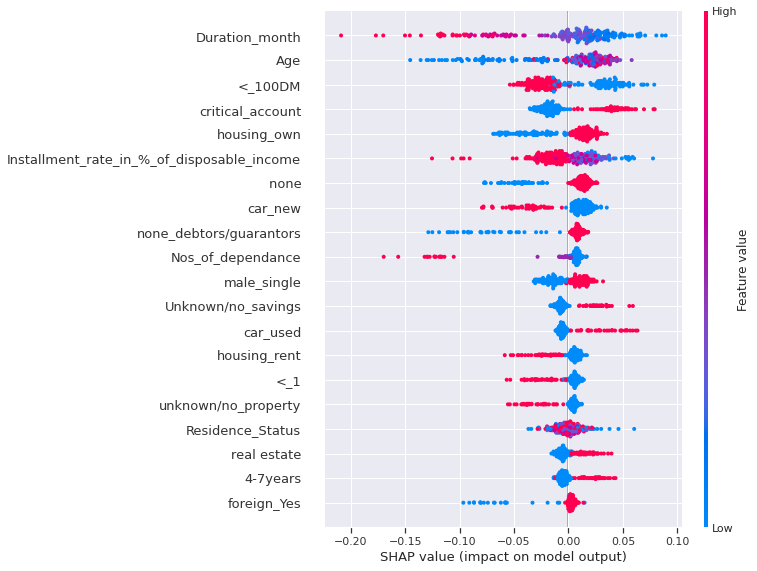

In [115]:
shap.summary_plot(shap_values[0], x_test)

In [94]:
pkl_clf = 'model.pkl'

with open(pkl_clf,'wb') as file:
    pickle.dump(clf, file)

In [95]:
scaler = 'scaler.pkl'

with open(scaler,'wb') as file:
    pickle.dump(scaler, file)